In [7]:
import keras
import warnings
warnings.simplefilter("ignore")
import sys,math
import os
import time,cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from keras.preprocessing.image import img_to_array, array_to_img,ImageDataGenerator,load_img
from keras.layers import Dense, Dropout,Conv2D,Flatten,Activation, MaxPooling2D,BatchNormalization
from keras.models import Sequential,Model
from keras import optimizers

from keras.callbacks import LearningRateScheduler,TensorBoard
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from skimage.io import imread
from keras.preprocessing import image


In [4]:
#run only when frame needs to be extracted
count=0

videoFile = "/content/drive/My Drive/Train Tom and jerry.mp4"
# capturing the video from the given path
cap = cv2.VideoCapture(videoFile) 
#here frame rate is 5(you can change it to any other number

frameRate=cap.get(5)
x=1
while(cap.isOpened()):
  frameId=cap.get(1) #current frame number
  ret,frame=cap.read()
  if(ret!=True):
    break 
  if(frameId % math.floor(frameRate)==0):
    
        filename ="/content/drive/My Drive/Sampled_Image_Train/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)


cap.release()
print ("Done!")


Done!


In [8]:
#run only when frame needs to be extracted
count=0

videoFile = "/content/drive/My Drive/Test.mp4"
# capturing the video from the given path
cap = cv2.VideoCapture(videoFile) 
#here frame rate is 5(you can change it to any other number

frameRate=cap.get(5)
x=1
while(cap.isOpened()):
  frameId=cap.get(1) #current frame number
  ret,frame=cap.read()
  if(ret!=True):
    break 
  if(frameId % math.floor(frameRate)==0):
    
        filename ="/content/drive/My Drive/Sampled_Image_Test/test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)


cap.release()
print ("Done!")


In [3]:
!ls '/content/drive/My Drive/Test Tom and Jerry.mp4'

'/content/drive/My Drive/Test Tom and Jerry.mp4'


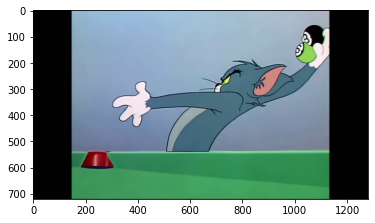

In [9]:
img = plt.imread('/content/drive/My Drive/Sampled_Image_Test/test0.jpg')   # reading image using its name
plt.imshow(img)

In [11]:
train=pd.read_csv('Train.csv',sep=',')

In [3]:
train.head()

,Frame_ID,Emotion
0,frame0.jpg,happy
1,frame1.jpg,happy
2,frame2.jpg,surprised
3,frame3.jpg,surprised
4,frame4.jpg,angry


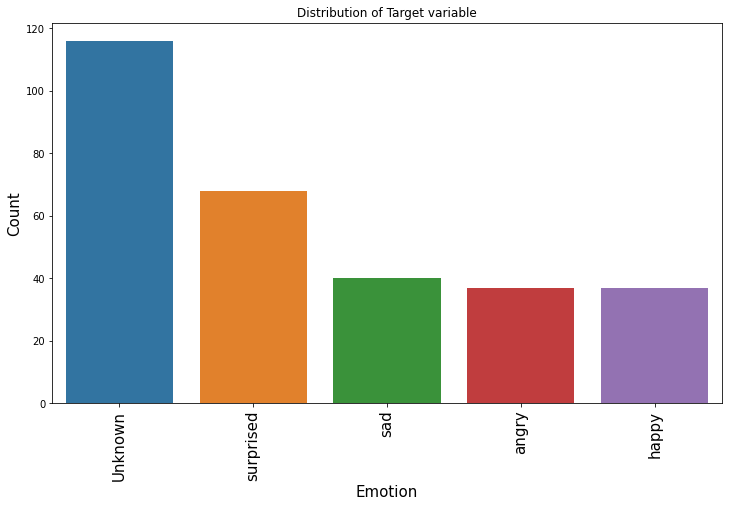

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(train.Emotion,order=train.Emotion.value_counts().index)
plt.xticks(fontsize=15,rotation=90)
plt.title('Distribution of Target variable')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Emotion',fontsize=15)
plt.show()


In [12]:
test=pd.read_csv('Test.csv',sep=',')

In [6]:
test.head()

,Frame_ID
0,test0.jpg
1,test1.jpg
2,test2.jpg
3,test3.jpg
4,test4.jpg


In [13]:
train_path='/content/drive/My Drive/Sampled_Image_Train/'
test_path='/content/drive/My Drive/Sampled_Image_Test/'
#image.load_img(train_path+train['Frame_ID'][0],grayscale=True,target_size=(360,640,1))

In [14]:
#create array
train_image = []
test_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(train_path+train['Frame_ID'][i], target_size=(360,640,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

 
#Dataloading for Test Images
for i in tqdm(range(test.shape[0])):
    img = image.load_img(test_path+test['Frame_ID'][i], target_size=(360,640,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test_array = np.array(test_image)

 
print("Test array created", test_array.shape)
print(X.shape)




100%|██████████| 186/186 [00:02<00:00, 67.21it/s]

Test array created (186, 360, 640, 1)
(298, 360, 640, 1)


In [87]:
pool_size=2
model=Sequential()
model.add(Conv2D(64,(4,4),activation='relu',input_shape=(360,640,1)))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 357, 637, 64)      1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 178, 318, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 178, 318, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 175, 315, 128)     131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 87, 157, 128)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 87, 157, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 155, 256)      2

In [89]:
y=train['Emotion']
dd={'happy':0,
 'surprised':1,
 'angry':2,
 'sad':3,
 'Unknown':4


 }

In [90]:
import keras.backend as k
k.clear_session()

In [91]:
y=y.map(dd)

In [92]:

y=to_categorical(y)

In [93]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model)
model.fit(X, y, epochs=100)

Epoch 1/100
10/10 [==============================] - 7s 635ms/step - loss: 204.4743 - accuracy: 0.1569
Epoch 2/100
10/10 [==============================] - 6s 634ms/step - loss: 60.3136 - accuracy: 0.2367
Epoch 3/100
10/10 [==============================] - 6s 634ms/step - loss: 33.5853 - accuracy: 0.3212
Epoch 4/100
10/10 [==============================] - 6s 636ms/step - loss: 15.8269 - accuracy: 0.3398
Epoch 5/100
10/10 [==============================] - 6s 637ms/step - loss: 11.4725 - accuracy: 0.4107
Epoch 6/100
10/10 [==============================] - 6s 639ms/step - loss: 5.8638 - accuracy: 0.4475
Epoch 7/100
10/10 [==============================] - 6s 642ms/step - loss: 3.6051 - accuracy: 0.5110
Epoch 8/100
10/10 [==============================] - 6s 641ms/step - loss: 2.2502 - accuracy: 0.4548
Epoch 9/100
10/10 [==============================] - 6s 642ms/step - loss: 2.1025 - accuracy: 0.4037
Epoch 10/100
10/10 [==============================] - 6s 644ms/step - loss: 2.2188 - 

In [50]:
model.save('./model.h5')
model.save_weights('./weights.h5')

In [94]:
prediction = model.predict_classes(test_array)
print(prediction)

[4 4 4 2 4 4 4 4 4 4 4 4 4 2 4 4 4 4 2 2 4 4 4 4 4 2 4 4 4 4 4 4 4 4 2 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 2 2 2 4 4 4 4 2 4 2 1 4 4 4 4 4 4 4 4 4 2
 2 2 2 4 4 4 4 2 2 2 2 2 2 2 4 2 2 4 4 2 4 4 2 2 2 2 2 4 4 2 2 2 2 4 2 4 2
 4 4 4 2 2 2 4 4 4 2 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 2 2 4 2 4
 2 2 2 2 2 2 2 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 2 4 2 4 4 4 2 2 4 4 4 4 2 4
 4]


In [101]:

emotion = ''
result = []
for i in prediction:
    if i == 2:
        emotion = 'angry'
    if i == 0:
        emotion = 'happy'
    if i == 3:
        emotion = 'sad'
    if i == 1:
        emotion = 'surprised'
    if i == 4:
        emotion = 'unknown'

    result.append(emotion)


In [102]:
test["Emotion"] = result

In [103]:

test.head()

,Frame_ID,Emotion
0,test0.jpg,unknown
1,test1.jpg,unknown
2,test2.jpg,unknown
3,test3.jpg,angry
4,test4.jpg,unknown


In [104]:
my_df = pd.DataFrame(test)
my_df.to_csv('Test.csv', index=False, header=False)